In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

1. Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

2. Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

3. Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

4. Matematik ve okuma notlarının dağılımı nedir?

5. Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

1.Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

In [2]:
states_all = pd.read_csv("states_all.csv")
states_all.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [3]:
states_all.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


Ogrencilerin matematik dersinde okuma dersinden daha basarili olduklarini goruyoruz.
Toplam harcamanin toplam gelirden yuksek oldugunu goruyoruz.

2.Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

In [10]:
y2 = states_all[ states_all.STATE == 'CALIFORNIA']["TOTAL_EXPENDITURE"]

In [9]:
x =states_all[ states_all.STATE == 'CALIFORNIA']["YEAR"]

In [8]:
y = states_all[ states_all.STATE == 'CALIFORNIA']["TOTAL_REVENUE"]

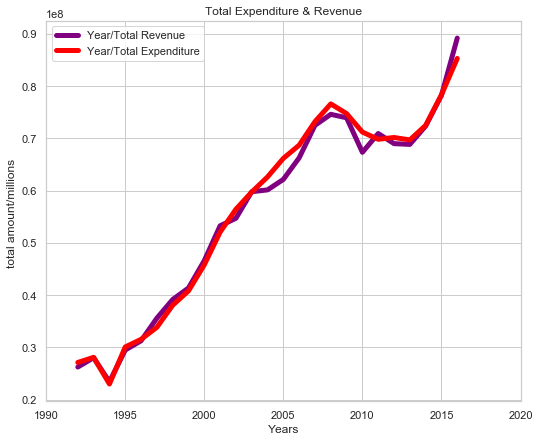

In [65]:
plt.figure(1, figsize = (8.5,7))
plt.plot(x,y, label = 'Year/Total Revenue', color='purple', linewidth=5)
plt.plot(x,y2, label = 'Year/Total Expenditure',color='red', linewidth=5)
plt.xlabel('Years')
plt.ylabel('total amount/millions ')
plt.xlim([1990, 2020])
plt.title('Total Expenditure & Revenue')
plt.legend()
plt.show()

Toplam harcam ave gelir egilimi 2003 yilina kadar birlikte hareket etmektedir. 2003 yili sonrasi toplam gelir toplam harcama karsisinda azalmistir.1994 yilinda en dusuk seviyesindeyken, 1995 yili sonrasinda hizli bir yukselisle artarak artmaya devam etmistir. 2007 sonrasi 2015 yili sonrasi ikisinde de artis gozlemlenmektedir. 

3. Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

In [108]:
states_all['fark4'] = (states_all['AVG_MATH_4_SCORE'] - states_all['AVG_READING_4_SCORE'])

In [110]:
states_all['fark8'] = (states_all['AVG_MATH_8_SCORE'] - states_all['AVG_READING_8_SCORE'])

In [117]:
x = states_all[states_all.STATE == 'CALIFORNIA'] [['YEAR', 'fark4']].dropna().YEAR
y = states_all[states_all.STATE == 'CALIFORNIA'] [['YEAR', 'fark4']].dropna().fark4


In [119]:
x2 = states_all[states_all.STATE == 'CALIFORNIA'] [['YEAR', 'fark8']].dropna().YEAR
y2 = states_all[states_all.STATE == 'CALIFORNIA'] [['YEAR', 'fark8']].dropna().fark8


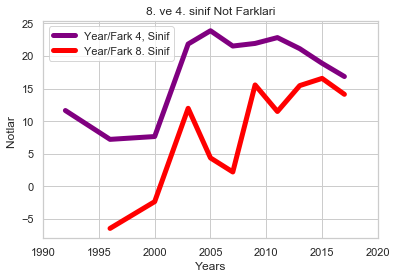

In [121]:
plt.plot(x,y, label = 'Year/Fark 4, Sinif', color='purple', linewidth=5)
plt.plot(x2,y2, label = 'Year/Fark 8. Sinif',color='red', linewidth=5)
plt.xlabel('Years')
plt.ylabel('Notlar ')
plt.xlim([1990, 2020])
plt.title('8. ve 4. sinif Not Farklari')
plt.legend()
plt.show()

In [83]:
np.max(states_all[ "AVG_MATH_4_SCORE"].mean())    

234.76829289706959

In [84]:
np.max(states_all[ "AVG_MATH_8_SCORE"].mean())

278.4147114511402

In [85]:
np.max(states_all[ "AVG_READING_4_SCORE"].mean())

218.8661539741663

In [86]:
np.max(states_all[ "AVG_READING_8_SCORE"].mean())

263.66113199437666

Ogrencilerin Matematikte daha basarili oldugunu goruyoruz. 

4. Matematik ve okuma notlarının dağılımı nedir?

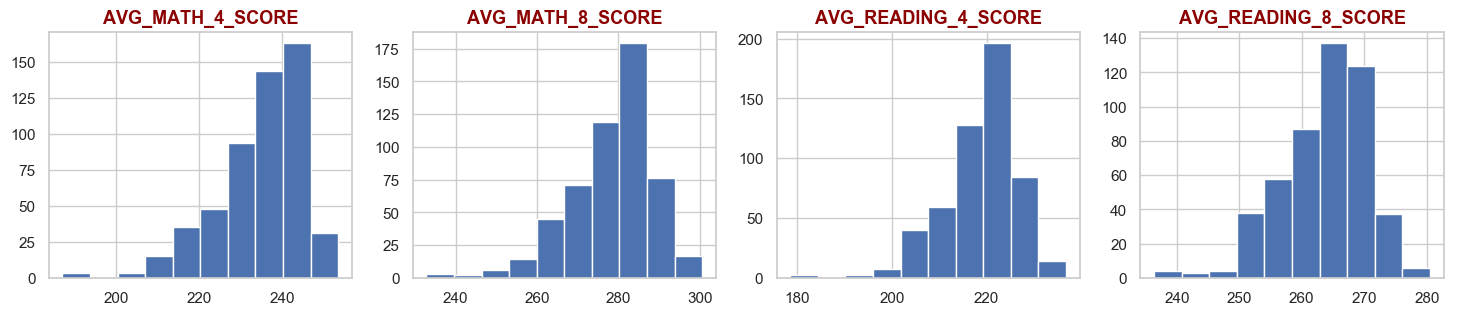

In [87]:
plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler3 = ['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


for i in range(4):
    plt.subplot(4, 4, i+1)
    plt.hist(states_all[degiskenler3[i]])
    plt.title(degiskenler3[i], fontdict=baslik_font)

Notlarin dagilimi normal dagilima yakindir. 

5. Matematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.



In [94]:
states_all["AVG_MATH_8_SCORE"].isnull().sum()/states_all["AVG_MATH_8_SCORE"].isnull().count()

0.6434316353887399

In [95]:
states_all["AVG_MATH_4_SCORE"].isnull().sum()/states_all["AVG_MATH_4_SCORE"].isnull().count()

0.6407506702412868

In [96]:
states_all["AVG_READING_4_SCORE"].isnull().sum()/states_all["AVG_READING_4_SCORE"].isnull().count()

0.6427613941018767

In [97]:
states_all["AVG_READING_8_SCORE"].isnull().sum()/states_all["AVG_READING_8_SCORE"].isnull().count()

0.6662198391420912

In [100]:
states_all2 = states_all.copy()

In [101]:
#Eksikleri Ortalama ile tamamlama
fill_list = ['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


for col in fill_list:
    states_all2.loc[:, col].fillna(states_all2.loc[:, col].mean(), inplace=True)

In [111]:
#Eksikleri Median ile tamamlama
states_all3 = states_all.copy()
fill_list = ['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


for col in fill_list:
    states_all3.loc[:, col].fillna(states_all3.loc[:, col].median(), inplace=True)

In [112]:
#Eksikleri enterpolasyon ile tamamlama
states_all4 = states_all.copy()
for col in fill_list:
    states_all4.loc[:,col].interpolate(inplace=True)

In [113]:
for col in fill_list:
    display ("{} sutunu icin istatistikler:".format(col))
    display(pd.concat([states_all[col],states_all2[col], states_all3[col], states_all4[col]], axis=1).describe())

'AVG_MATH_4_SCORE sutunu icin istatistikler:'

,AVG_MATH_4_SCORE,AVG_MATH_4_SCORE,AVG_MATH_4_SCORE,AVG_MATH_4_SCORE
count,536.000000,1492.000000,1492.000000,1492.000000
mean,234.768293,234.768293,236.351113,231.831206
std,10.221511,6.122843,6.236570,9.888230
min,187.134670,187.134670,187.134670,187.134670
25%,229.694352,234.768293,237.238552,223.340211
50%,237.238552,234.768293,237.238552,233.721360
75%,241.995486,234.768293,237.238552,239.951138
max,253.420961,253.420961,253.420961,253.420961


'AVG_MATH_8_SCORE sutunu icin istatistikler:'

,AVG_MATH_8_SCORE,AVG_MATH_8_SCORE,AVG_MATH_8_SCORE,AVG_MATH_8_SCORE
count,532.000000,1492.000000,1492.000000,1492.000000
mean,278.414711,278.414711,279.832894,274.751965
std,10.159722,6.063038,6.154327,8.676490
min,232.831510,232.831510,232.831510,232.831510
25%,272.761598,278.414711,280.618803,268.959808
50%,280.618803,278.414711,280.618803,274.343601
75%,285.347428,278.414711,280.618803,281.420997
max,300.568235,300.568235,300.568235,300.568235


'AVG_READING_4_SCORE sutunu icin istatistikler:'

,AVG_READING_4_SCORE,AVG_READING_4_SCORE,AVG_READING_4_SCORE,AVG_READING_4_SCORE
count,533.000000,1492.000000,1492.000000,1492.000000
mean,218.866154,218.866154,219.862357,218.278270
std,7.769616,4.641053,4.700141,6.095477
min,178.557612,178.557612,178.557612,178.557612
25%,214.663401,218.866154,220.416034,214.568273
50%,220.416034,218.866154,220.416034,218.954112
75%,223.999337,218.866154,220.416034,222.376359
max,236.773867,236.773867,236.773867,236.773867


'AVG_READING_8_SCORE sutunu icin istatistikler:'

,AVG_READING_8_SCORE,AVG_READING_8_SCORE,AVG_READING_8_SCORE,AVG_READING_8_SCORE
count,498.000000,1492.000000,1492.000000,1491.000000
mean,263.661132,263.661132,264.560382,262.125714
std,6.803725,3.928132,3.979401,5.310612
min,236.379102,236.379102,236.379102,236.379102
25%,259.533171,263.661132,265.010912,258.619193
50%,265.010912,263.661132,265.010912,261.079602
75%,268.190121,263.661132,265.010912,266.227052
max,280.499130,280.499130,280.499130,280.499130
